In [1]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

credit = fetch_ucirepo(id=27)

In [3]:
# Call in the data features
X = credit.data.features
X = X.iloc[:, ::-1]
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750


In [4]:
# Call in the target data
y = credit.data.targets
y

,A16
0,+
1,+
2,+
3,+
4,+
...,...
685,-
686,-
687,-
688,-


In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(X)
df = pd.concat([df, y], axis=1)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [6]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


In [7]:
# Count NaN values in each column
nan_counts = df.isna().sum()

print(nan_counts)

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


In [8]:
categorical_cols = ["A1", "A4","A5", "A6", "A7", "A9", "A10", "A12", "A13"]
continuous_cols = ["A2", "A3", "A8", "A11", "A14", "A15"]

# Fill missing values in categorical variables with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in continuous variables with median
for col in continuous_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Display the first few rows of the dataframe
print(df.head())

# Verify if there are any remaining missing values
missing_values_after = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after)

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +
Missing values after imputation:
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [10]:
print(df["A16"])

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: A16, Length: 690, dtype: object


In [11]:
df["A16"].unique()

array(['+', '-'], dtype=object)

In [12]:
# Print the number of denials and approvals
df["A16"].value_counts() # a ' - ' means that the applicant was denied and a ' + ' means they were approved

-    383
+    307
Name: A16, dtype: int64

In [13]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [15]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


In [16]:
# Define the mapping dictionary for column renaming
column_mapping = {
    'A1': 'Gender',
    'A2': 'Age',
    'A3': 'Debt',
    'A4': 'Married',
    'A5': 'BankCustomer',
    'A6': 'EducationLevel',
    'A7': 'Ethnicity',
    'A8': 'YearsEmployed',
    'A9': 'PriorDefault',
    'A10': 'Employed',
    'A11': 'CreditScore',
    'A12': 'DriversLicense',
    'A13': 'Citizen',
    'A14': 'ZipCode',
    'A15': 'Income',
    'A16': 'ApprovalStatus'
}
# Rename the columns
df.rename(columns=column_mapping, inplace=True)

In [17]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


In [18]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
EducationLevel      int64
Ethnicity           int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen             int64
ZipCode           float64
Income              int64
ApprovalStatus      int64
dtype: object

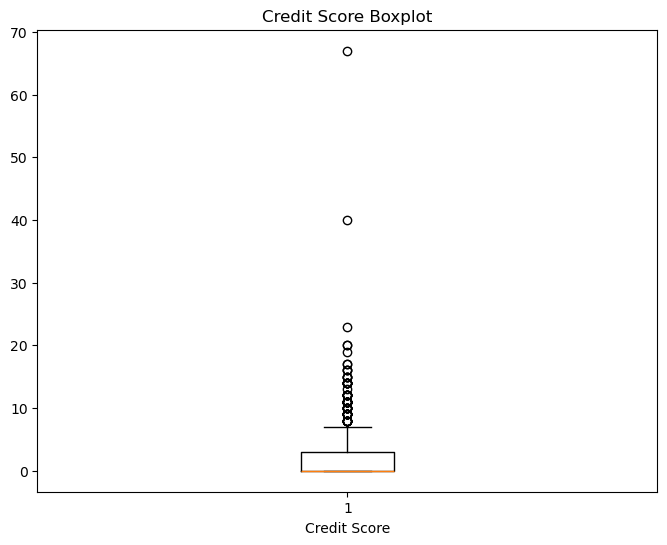

In [19]:
# plot a boxplot for credit score only
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.boxplot(df["CreditScore"])
plt.xlabel("Credit Score")
plt.title("Credit Score Boxplot")
plt.show()

In [20]:
"""
This boxplot shows that the majority of our applicant pool are credit-risky which makes sense given that out data include 383 denials and only 307 approvals.
With over 55% of our applicants being denied, we can be sure that many will want to take advantage of our credit-building debit card. 
"""

'\nThis boxplot shows that the majority of our applicant pool are credit-risky which makes sense given that out data include 383 denials and only 307 approvals.\nWith over 55% of our applicants being denied, we can be sure that many will want to take advantage of our credit-building debit card. \n'

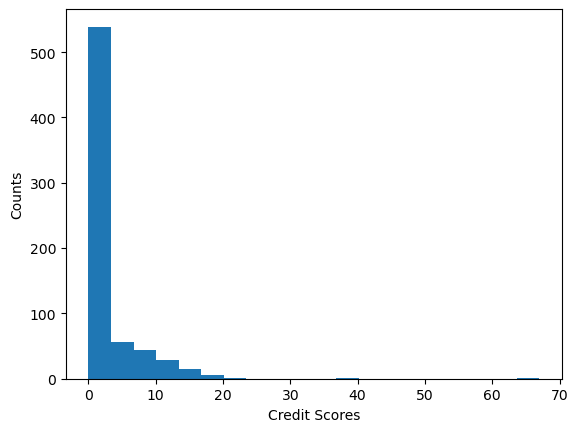

In [21]:
# Plot a histogram
plt.hist(df["CreditScore"], bins=20)
plt.xlabel("Credit Scores")
plt.ylabel("Counts")
plt.show()

In [22]:
# Majority of our applicants seems to have scores under 100 in a traditional credit score system

In [23]:
# show unique values of credit scores
df["CreditScore"].unique()

array([ 1,  6,  0,  5,  7, 10,  3, 17,  2,  9,  8, 15, 11, 12, 40, 23,  4,
       20, 67, 14, 16, 13, 19])

In [24]:
#pd.set_option('display.max_rows', None)
income = df[["Income"]]
print(income.T)
#pd.reset_option('display.max_rows')

        0    1    2    3    4    5      6     7    8     9    ...  680  681  \
Income    0  560  824    3    0    0  31285  1349  314  1442  ...  364  537   

        682  683  684  685  686  687  688  689  
Income    2    3    0    0  394    1  750    0  

[1 rows x 690 columns]


In [25]:
creditscore = df[["CreditScore"]]
creditscore.T

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
CreditScore,1,6,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0


In [26]:
df_denials= df.drop(["Age", "DriversLicense", "ZipCode", "Ethnicity", "Citizen", "Married", "Gender"], axis=1)

In [27]:
# DENIALS ARE SET TO 1
subset_denied = df_denials[df_denials["ApprovalStatus"]==1]
subset_denied

,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income,ApprovalStatus
70,7.500,0,4,1.585,1,0,0,0,1
71,4.000,0,3,12.500,1,0,0,0,1
72,5.000,0,2,13.500,1,0,0,0,1
73,0.500,0,9,10.750,1,0,0,0,1
74,7.000,2,1,1.625,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...
685,10.085,2,4,1.250,0,0,0,0,1
686,0.750,0,1,2.000,0,1,2,394,1
687,13.500,2,5,2.000,0,1,1,1,1
688,0.205,0,0,0.040,0,0,0,750,1


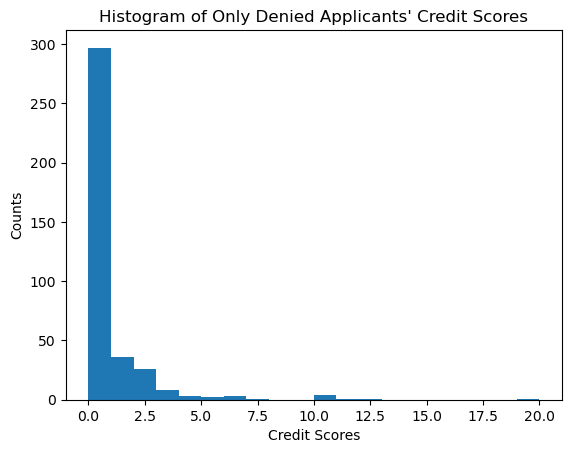

In [28]:
# plot a histogram of just the denied applicants
plt.hist(subset_denied["CreditScore"], bins=20)
plt.xlabel("Credit Scores")
plt.ylabel("Counts")
plt.title("Histogram of Only Denied Applicants' Credit Scores")
plt.show()

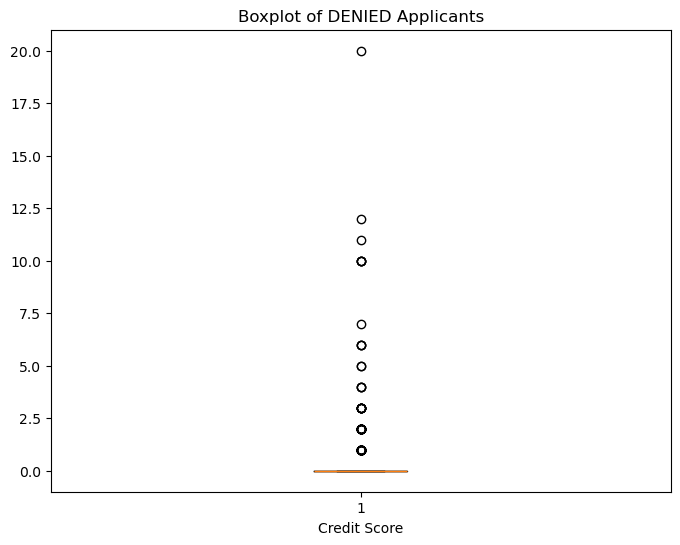

In [29]:
# Boxplot of only denied applicants
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.boxplot(subset_denied["CreditScore"])
plt.xlabel("Credit Score")
plt.title("Boxplot of DENIED Applicants")
plt.show()

In [30]:
# prepare data to get a histogram of only the approved applicants
subset_approved = df_denials[df_denials["ApprovalStatus"]==0]
subset_approved

,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income,ApprovalStatus
0,0.000,0,12,1.25,1,1,1,0,0
1,4.460,0,10,3.04,1,1,6,560,0
2,0.500,0,10,1.50,1,0,0,824,0
3,1.540,0,12,3.75,1,1,5,3,0
4,5.625,0,12,1.71,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
599,2.415,0,1,2.00,1,1,11,3000,0
600,0.460,0,8,0.54,1,1,4,500,0
606,0.040,0,1,0.04,0,0,0,0,0
621,0.165,0,1,2.25,0,0,0,0,0


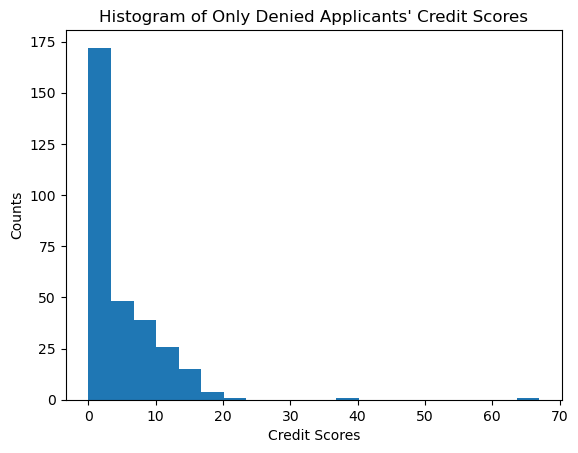

In [31]:
# plot a histogram of just the APPROVED applicants
plt.hist(subset_approved["CreditScore"], bins=20)
plt.xlabel("Credit Scores")
plt.ylabel("Counts")
plt.title("Histogram of Only Denied Applicants' Credit Scores")
plt.show()

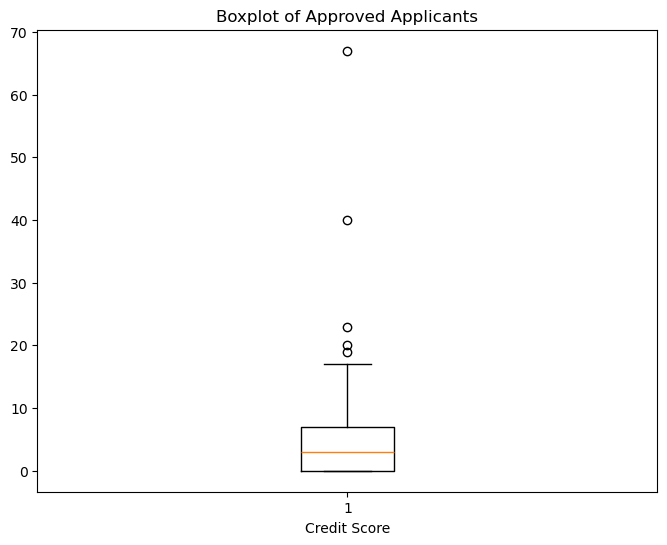

In [32]:
# Boxplot of only APPROVED applicants
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.boxplot(subset_approved["CreditScore"])
plt.xlabel("Credit Score")
plt.title("Boxplot of Approved Applicants")
plt.show()

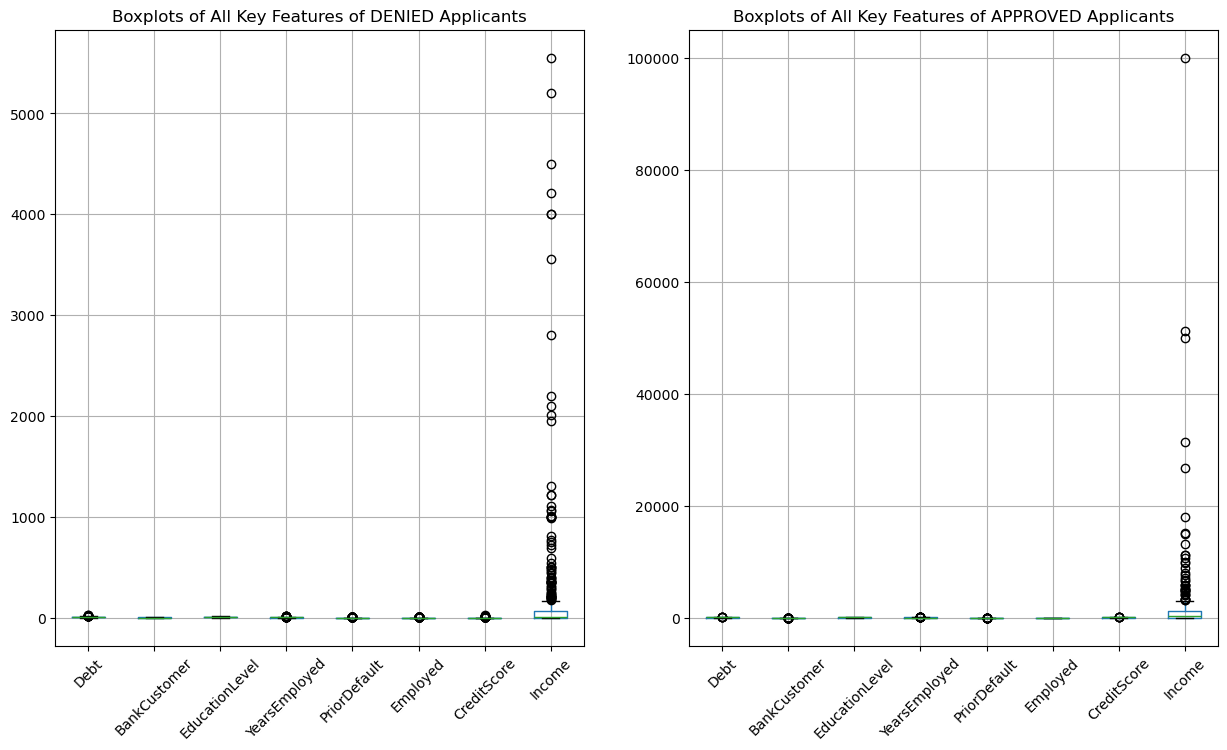

In [33]:
# plot boxplots for all features to see if there are differences between denied vs approved applicants

denied_copy = subset_denied.copy()
approved_copy = subset_approved.copy()
denied_copy = denied_copy.drop(["ApprovalStatus"], axis=1)
approved_copy = approved_copy.drop(["ApprovalStatus"], axis=1)

fig, ax = plt.subplots(1,2,figsize=(15,8))

# plot denied applicants
denied_copy.boxplot(ax=ax[0])
ax[0].set_title("Boxplots of All Key Features of DENIED Applicants")
ax[0].tick_params(axis="x",rotation=45)

# plot approved applicants
approved_copy.boxplot(ax=ax[1])
ax[1].set_title("Boxplots of All Key Features of APPROVED Applicants")
ax[1].tick_params(axis="x",rotation=45)
plt.show()

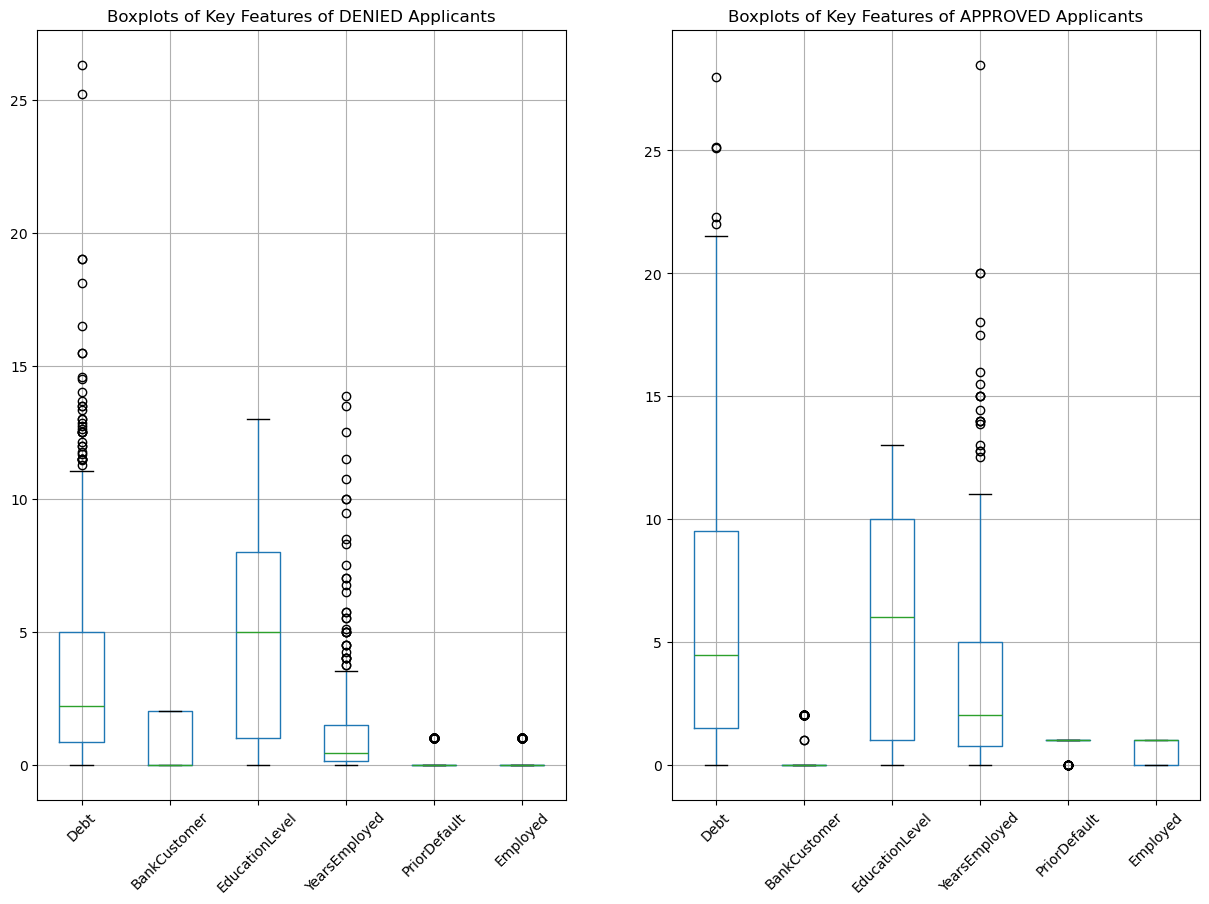

In [34]:
# plot everthing but income and credit score
denied_copy = denied_copy.drop(["Income", "CreditScore"], axis=1)
approved_copy = approved_copy.drop(["Income", "CreditScore"], axis=1)

fig, ax = plt.subplots(1,2,figsize=(15,10))

# plot denied applicants
denied_copy.boxplot(ax=ax[0])
ax[0].set_title("Boxplots of Key Features of DENIED Applicants")
ax[0].tick_params(axis="x",rotation=45)

# plot approved applicants
approved_copy.boxplot(ax=ax[1])
ax[1].set_title("Boxplots of Key Features of APPROVED Applicants")
ax[1].tick_params(axis="x",rotation=45)
plt.show()

In [35]:
# prep data for only income boxplots to be called in
income_denied = pd.DataFrame(subset_denied["Income"])
income_approved = pd.DataFrame(subset_approved["Income"])

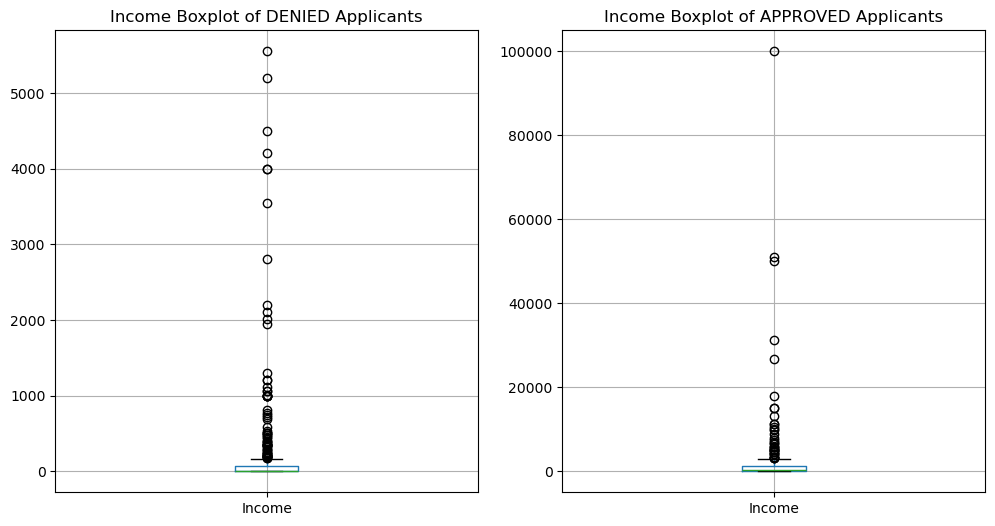

In [36]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

# plot denied applicants
income_denied.boxplot(ax=ax[0])
ax[0].set_title("Income Boxplot of DENIED Applicants")
ax[0].tick_params(axis="x")

# plot approved applicants
income_approved.boxplot(ax=ax[1])
ax[1].set_title("Income Boxplot of APPROVED Applicants")
ax[1].tick_params(axis="x")
plt.show()

In [37]:
# Apply the 10 point increase only denied applicants which translates to ~100 more points in traditional American credit score system
subset_denied["CreditScore"] += 10
subset_denied

/var/folders/g0/q2ktwmp57gdbc87c4n7sm6880000gn/T/ipykernel_7244/457431449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_denied["CreditScore"] += 10


,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income,ApprovalStatus
70,7.500,0,4,1.585,1,0,10,0,1
71,4.000,0,3,12.500,1,0,10,0,1
72,5.000,0,2,13.500,1,0,10,0,1
73,0.500,0,9,10.750,1,0,10,0,1
74,7.000,2,1,1.625,0,0,10,2,1
...,...,...,...,...,...,...,...,...,...
685,10.085,2,4,1.250,0,0,10,0,1
686,0.750,0,1,2.000,0,1,12,394,1
687,13.500,2,5,2.000,0,1,11,1,1
688,0.205,0,0,0.040,0,0,10,750,1


In [38]:
# create an X_pred that will be the denied subset with the increase credit score to be used for the random forest prediction model
X_pred = subset_denied.drop(["ApprovalStatus"], axis=1)
X= df.drop(["Age", "DriversLicense", "ZipCode", "Ethnicity", "Citizen", "ApprovalStatus", "Married", "Gender"], axis=1)
y=df["ApprovalStatus"]
X_pred

,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income
70,7.500,0,4,1.585,1,0,10,0
71,4.000,0,3,12.500,1,0,10,0
72,5.000,0,2,13.500,1,0,10,0
73,0.500,0,9,10.750,1,0,10,0
74,7.000,2,1,1.625,0,0,10,2
...,...,...,...,...,...,...,...,...
685,10.085,2,4,1.250,0,0,10,0
686,0.750,0,1,2.000,0,1,12,394
687,13.500,2,5,2.000,0,1,11,1
688,0.205,0,0,0.040,0,0,10,750


In [39]:
# Check X before using it in random forest since we don't need normalized features
X

,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income
0,0.000,0,12,1.25,1,1,1,0
1,4.460,0,10,3.04,1,1,6,560
2,0.500,0,10,1.50,1,0,0,824
3,1.540,0,12,3.75,1,1,5,3
4,5.625,0,12,1.71,1,0,0,0
...,...,...,...,...,...,...,...,...
685,10.085,2,4,1.25,0,0,0,0
686,0.750,0,1,2.00,0,1,2,394
687,13.500,2,5,2.00,0,1,1,1
688,0.205,0,0,0.04,0,0,0,750


In [40]:
# testing this with Alex's random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# using an unscaled X since random forest does not need to be normalized
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size = 0.2)

rf = RandomForestClassifier(n_estimators=100, random_state=0, min_samples_split= 4, min_samples_leaf=1, max_depth=5, bootstrap=True)
rf.fit(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Final Test Set Accuracy: ", test_score)

Final Test Set Accuracy:  0.8985507246376812


In [41]:
y_test

134    0
212    0
655    1
83     1
297    1
      ..
271    1
517    0
28     0
377    1
244    0
Name: ApprovalStatus, Length: 138, dtype: int64

In [42]:
predict_debits = rf.predict(X_pred)
predict_debits

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [43]:
# Number of approved cards after the increase with random forest
print("Number of approved applications:", sum(predict_debits==0))
print("\nNumber of DENIED applications:", sum(predict_debits==1))

Number of approved applications: 76

Number of DENIED applications: 307


In [44]:
# ratio of approved applicants divided by the total number of applicants in our dataset
sum(predict_debits==0)/len(predict_debits)

0.19843342036553524

In [45]:
approved = df_denials
approved = approved.drop(["ApprovalStatus"], axis=1)
approved

,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income
0,0.000,0,12,1.25,1,1,1,0
1,4.460,0,10,3.04,1,1,6,560
2,0.500,0,10,1.50,1,0,0,824
3,1.540,0,12,3.75,1,1,5,3
4,5.625,0,12,1.71,1,0,0,0
...,...,...,...,...,...,...,...,...
685,10.085,2,4,1.25,0,0,0,0
686,0.750,0,1,2.00,0,1,2,394
687,13.500,2,5,2.00,0,1,1,1
688,0.205,0,0,0.04,0,0,0,750


In [46]:
# calculate the model prediction on the original dataset first before the increase
original_predictions = rf.predict(approved)
original_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
# Sum of total applications approved with the original dataset
np.sum(original_predictions == 0)

298

In [48]:
# Calculate the number of approvals before and after the credit score increase
approvals_before = np.sum(original_predictions == 0) # number of approvals at the start
# We are adding the original predictions because we want to evaluate this from the standpoint of whether we would have approved the first time they applied with this credit score
approvals_after = np.sum(predict_debits == 0)+approvals_before 
print("Approvals Before Score Increase:", approvals_before)
print("Approvals After Score Increase:", approvals_after)

Approvals Before Score Increase: 298
Approvals After Score Increase: 374


In [49]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Calculate the total number of observations
count_obs_before = len(original_predictions)
count_obs_after = len(predict_debits)+count_obs_before

# Calculate two-proportion z-test
stat, pvalue = proportions_ztest([approvals_before, approvals_after], [count_obs_before, count_obs_after])

print(f'Z-statistic: {stat}, P-value: {pvalue}')

# 95% confidence interval
alpha = 0.05 
if pvalue < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference in the approval rates.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the approval rates.")


Z-statistic: 3.515990290646982, P-value: 0.00043811700588781586
We reject the null hypothesis. There is a statistically significant difference in the approval rates.
